In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
 

In [8]:
# Replace 'file_path.csv' with the actual file path
file_path = r"housing.csv"

# Read the CSV file into a DataFrame
housing_df = pd.read_csv(file_path)

In [10]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing_df["ocean_proximity"].values


array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

In [12]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


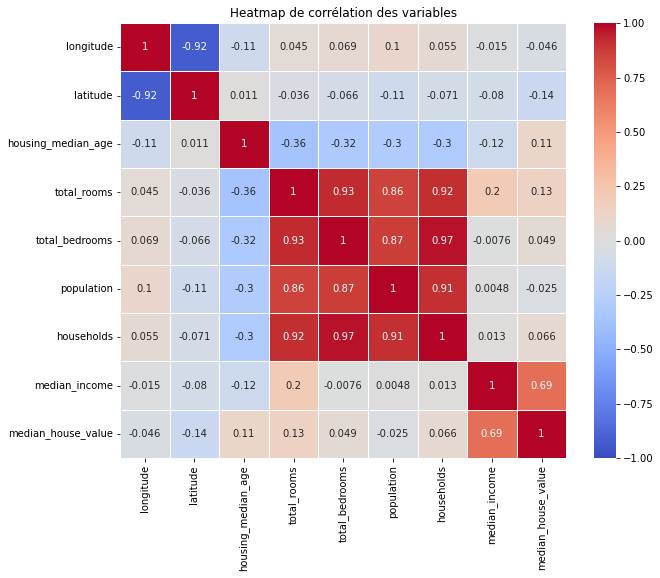

In [52]:

# Calculer la matrice de corrélation
corr_matrix = housing_df.corr()

# Tracer la heatmap
plt.figure(figsize=(10, 8))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Ajouter un titre
plt.title("Heatmap de corrélation des variables")

# Afficher la heatmap
plt.show()


In [53]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

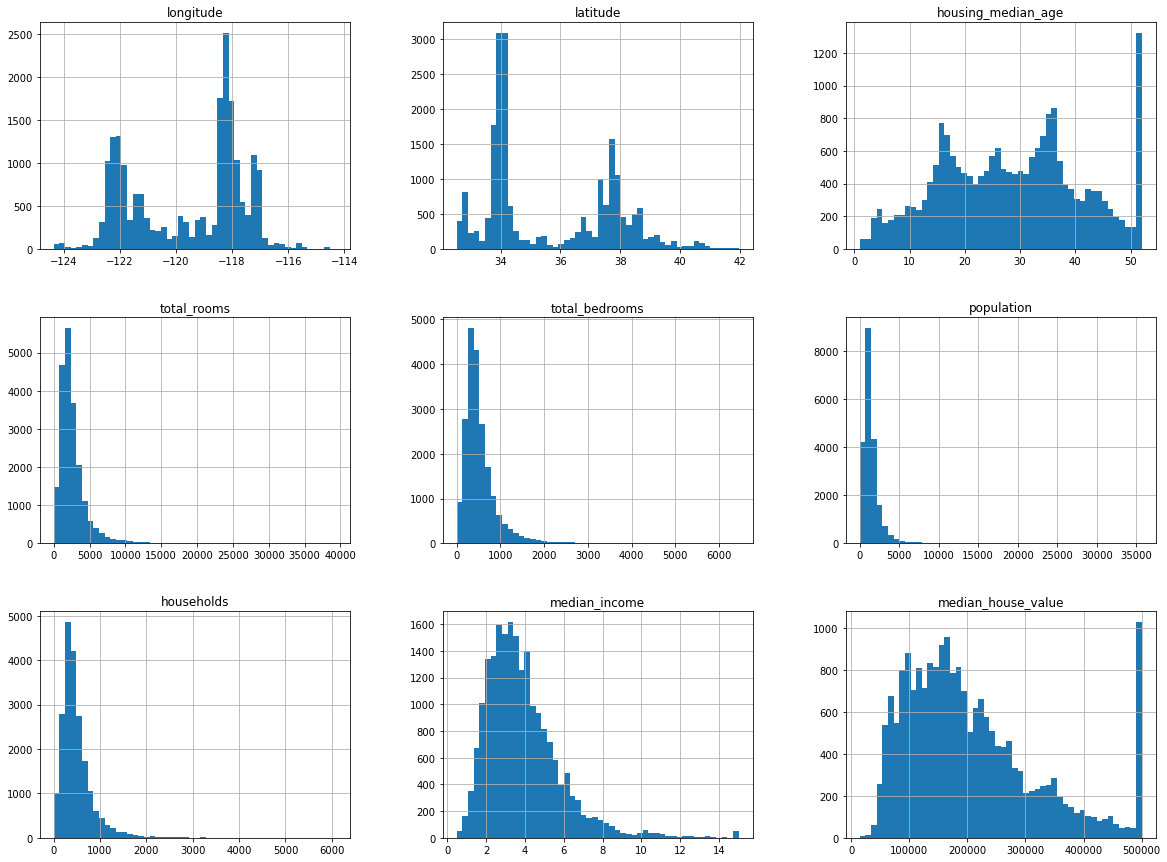

In [54]:
%matplotlib inline
housing_df.hist(bins=50, figsize=(20,15))
plt.show()
 

In [55]:
"""training_set = housing_df [:1600]
test_set = housing_df [1600:]"""

training_set_threshold=int(len(housing_df)*0.8)

training_set = housing_df[:training_set_threshold]
test_set = housing_df[training_set_threshold:]


print("train_test_size", len(training_set))
print("test_test_size", len(test_set))

train_test_size 16512
test_test_size 4128


In [57]:
housing_df_new=housing_df.drop("ocean_proximity", axis=1)

In [61]:
housing_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [62]:
housing_df_new.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


In [64]:
housing_df_new.corr()["median_house_value"]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049457
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

""""----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"""

In [34]:
# Séparation des variables indépendantes (X) et dépendantes (Y)
X = housing_df.drop("housing_median_age", axis=1)  # Toutes les colonnes sauf 'housing_median_age'
y = housing_df["housing_median_age"]  # La variable cible (housing_median_age)

# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print(f"Dimensions des données d'entraînement (X_train, y_train) : {X_train.shape}, {y_train.shape}")
print(f"Dimensions des données de test (X_test, y_test) : {X_test.shape}, {y_test.shape}")

# Maintenant vous pouvez continuer avec la création du modèle, par exemple la régression linéaire.

Dimensions des données d'entraînement (X_train, y_train) : (16512, 9), (16512,)
Dimensions des données de test (X_test, y_test) : (4128, 9), (4128,)


In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Remplacer les valeurs manquantes par la médiane
housing_df.fillna(housing_df.median(), inplace=True)

# Séparation des variables indépendantes (X) et dépendantes (y)
X = housing_df.drop("housing_median_age", axis=1)  # Toutes les colonnes sauf 'housing_median_age'
y = housing_df["housing_median_age"]  # La variable cible (housing_median_age)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un transformateur pour encoder la colonne 'ocean_proximity' avec OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('ocean_proximity', OneHotEncoder(), ['ocean_proximity'])  # Encoder 'ocean_proximity'
    ], 
    remainder='passthrough'  # Garder les autres colonnes inchangées
)

# Créer un pipeline qui inclut l'encodage et le modèle de régression linéaire
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Encodage des variables catégorielles
    ('regressor', LinearRegression())  # Modèle de régression linéaire
])

# Entraîner le modèle avec le pipeline
pipeline.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = pipeline.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE) et le score R^2 pour évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Score R^2 : {r2:.2f}")


Erreur quadratique moyenne (MSE) : 117.27
Score R^2 : 0.25


C:\Users\AHMEDL~1\AppData\Local\Temp/ipykernel_36680/2120179111.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_df.fillna(housing_df.median(), inplace=True)


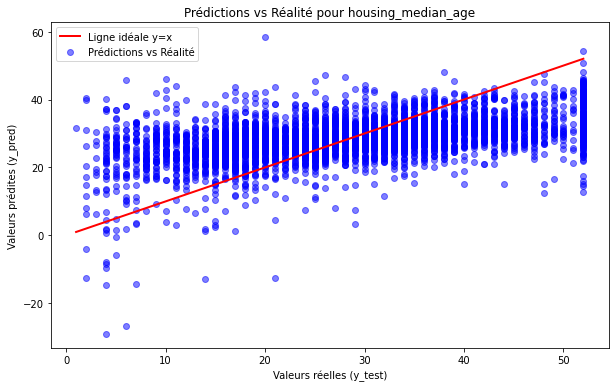

In [38]:
import matplotlib.pyplot as plt

# Tracer la vérité terrain (y_test) vs les prédictions (y_pred)
plt.figure(figsize=(10, 6))

# Scatter plot des valeurs réelles
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Prédictions vs Réalité')

# Tracer la ligne de parfaite correspondance (ligne y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ligne idéale y=x')

# Ajouter les labels et titre
plt.title('Prédictions vs Réalité pour housing_median_age')
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred)')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculer les prédictions
y_pred = pipeline.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculer le score R^2
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 117.26867923806549
R² Score: 0.2514923216784649
